In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency, zscore, stats

# Definir a localidade para português do Brasil (ou outra localidade que use a vírgula como separador de milhares)
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

## Recuperar a base presentes sem missing 

In [2]:
# Import final data base - 32 MM é o total de inscristos ao longo de 9 anos ja tratado os missings
df1 = pd.read_csv('df_presentes_sm_marcada.csv', sep = ';')

In [65]:
df1.describe()

,NU_ANO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,concluinte_3ano,baixarenda,marcacao,cat_Q001,cat_Q002,cat_Q003,cat_Q004,cat_Q006,cat_Q007,cat_Q008,cat_Q009,cat_Q010,cat_Q011,cat_Q012,cat_Q013,cat_Q014,cat_Q015,cat_Q016,cat_Q017,cat_Q019,cat_Q022,cat_Q024,cat_Q018,cat_Q020,cat_Q021,cat_Q023,cat_Q025,FEMININO,cat_Norte,cat_Nordeste,cat_Sul,cat_CentroOeste,cat_Sudeste,TIC,I,C,sóI,sóC,IeC
count,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00,32601016.00
mean,2018.20,21.23,0.50,2.09,1.68,2.39,1.38,489.19,535.00,517.48,512.29,560.83,3.92,0.32,0.51,0.16,3.57,4.17,2.38,2.31,3.15,0.14,1.43,2.29,0.57,0.26,1.03,0.41,0.63,0.12,0.53,0.03,1.40,2.46,0.81,0.21,0.40,0.25,0.29,0.76,0.59,0.11,0.35,0.11,0.08,0.35,2.99,0.76,0.61,0.20,0.04,0.57
std,2.55,7.00,0.59,1.02,0.79,3.64,0.63,76.27,83.18,71.24,112.82,181.83,1.46,0.47,0.50,0.36,1.91,1.75,1.44,1.34,4.29,0.55,0.76,0.78,0.71,0.50,0.27,0.56,0.51,0.34,0.51,0.18,0.80,1.08,0.83,0.41,0.49,0.43,0.45,0.42,0.49,0.31,0.48,0.31,0.28,0.48,1.24,0.42,0.49,0.40,0.20,0.50
min,2015.00,10.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2016.00,17.00,0.00,1.00,1.00,0.00,1.00,431.40,477.00,471.30,425.20,460.00,3.00,0.00,0.00,0.00,2.00,3.00,1.00,2.00,1.00,0.00,1.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00
50%,2018.00,19.00,0.00,2.00,1.00,0.00,1.00,480.50,540.30,522.10,492.00,560.00,4.00,0.00,1.00,0.00,4.00,5.00,2.00,2.00,1.50,0.00,1.00,2.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,1.00,1.00,0.00,0.00,1.00
75%,2020.00,22.00,1.00,3.00,2.00,3.00,2.00,540.20,595.30,567.80,585.30,660.00,5.00,1.00,1.00,0.00,5.00,5.00,4.00,4.00,3.00,0.00,2.00,3.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,4.00,1.00,1.00,0.00,0.00,1.00
max,2023.00,92.00,4.00,6.00,4.00,17.00,4.00,885.60,868.30,826.10,1008.30,1000.00,20.00,1.00,1.00,1.00,7.00,7.00,5.00,5.00,30.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00


In [90]:
df=df1

In [91]:
df = df[df['concluinte_3ano'] == 1]

In [92]:
df = df[df['baixarenda'] == 1]

## seleçao da amostra

## Definir amostra 30%

In [93]:
# Definir uma semente para garantir que a amostra possa ser reproduzida
seed = 42

# Extrair uma amostra de 30% de cada ano com uma semente aleatória
df = df.groupby('NU_ANO').apply(lambda x: x.sample(frac=0.3, random_state=seed)).reset_index(drop=True)

In [94]:
df.shape

(1544670, 56)

In [77]:
df['NU_MEDIA'] = (df['NU_NOTA_MT'] + df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC']) / 4

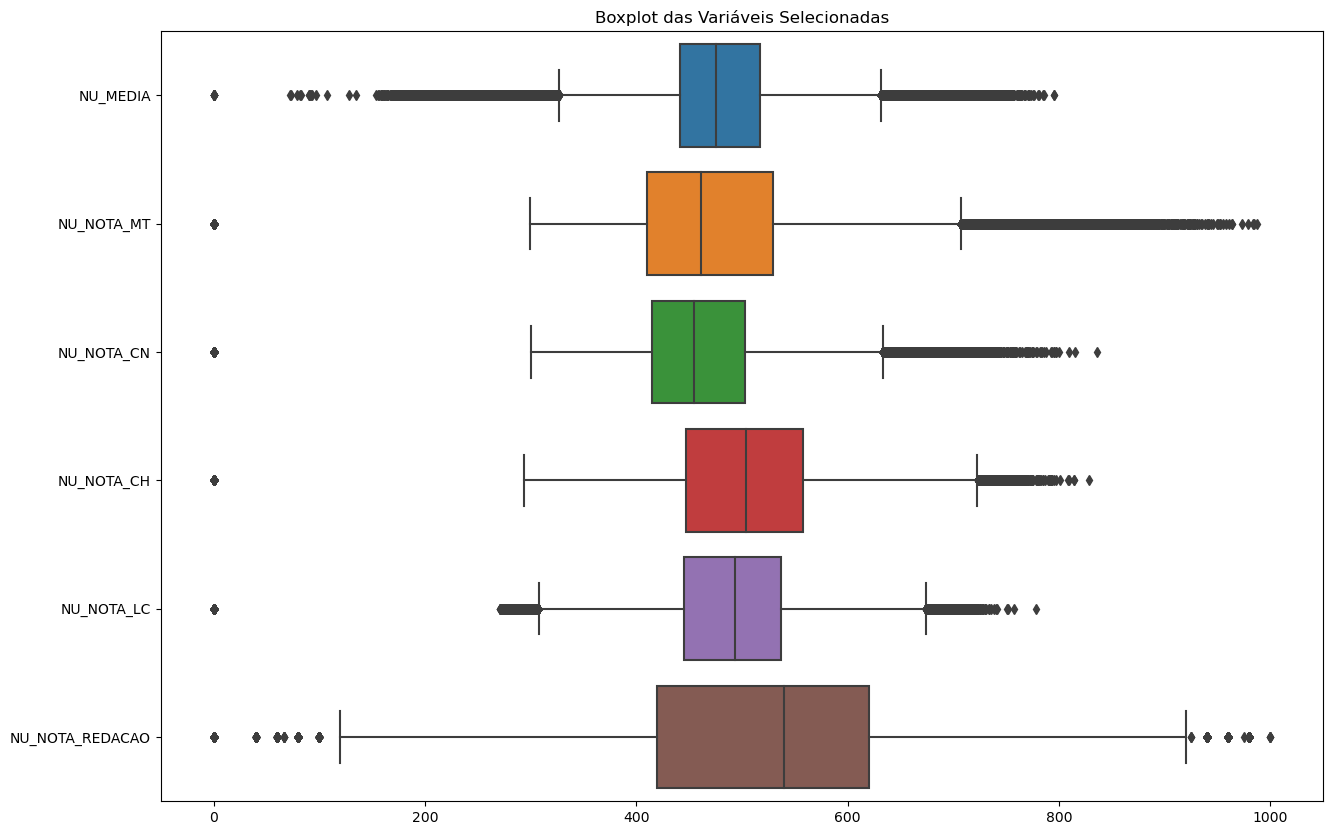

In [78]:
variaveis_selecionadas = ['NU_MEDIA', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

# Filtrar o DataFrame para incluir apenas essas variáveis
df_selecionado = df[variaveis_selecionadas]

# Criar o boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_selecionado, orient='h')
plt.title("Boxplot das Variáveis Selecionadas")
plt.show()

In [95]:
df.NU_NOTA_CN.describe()

count   1544670.00
mean        461.62
std          62.84
min           0.00
25%         415.30
50%         454.40
75%         502.50
max         835.50
Name: NU_NOTA_CN, dtype: float64

In [96]:
# Lista das colunas de notas
notas = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

# Dicionário para armazenar a quantidade de outliers por nota
outliers_count = {}

# Iterar sobre cada coluna de nota
for nota in notas:
    # Cálculo da média e do desvio padrão
    mean = df[nota].mean()
    std_dev = df[nota].std()

    # Definindo limites para identificar outliers
    low_limit = mean - 3 * std_dev
    high_limit = mean + 3 * std_dev

    # Identificação de outliers
    outliers = df[(df[nota] < low_limit) | (df[nota] > high_limit)]
    
    # Armazenar o número de outliers no dicionário
    outliers_count[nota] = outliers.shape[0]
    
    # Excluir registros que são outliers
    df = df[(df[nota] >= low_limit) & (df[nota] <= high_limit)]
    
    # Exibe o número de registros após remover outliers
    print(f"Número de registros após remover outliers {nota}: {df.shape[0]}")

# Exibe o número de outliers por nota
print("Número de outliers por nota:", outliers_count)

Número de registros após remover outliers NU_NOTA_MT: 1534616
Número de registros após remover outliers NU_NOTA_CN: 1531471
Número de registros após remover outliers NU_NOTA_CH: 1529807
Número de registros após remover outliers NU_NOTA_LC: 1529177
Número de outliers por nota: {'NU_NOTA_MT': 10054, 'NU_NOTA_CN': 3145, 'NU_NOTA_CH': 1664, 'NU_NOTA_LC': 630}


In [97]:
df.shape

(1529177, 56)

In [101]:
df['NU_MEDIA'] = (df['NU_NOTA_MT'] + df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC']) / 4

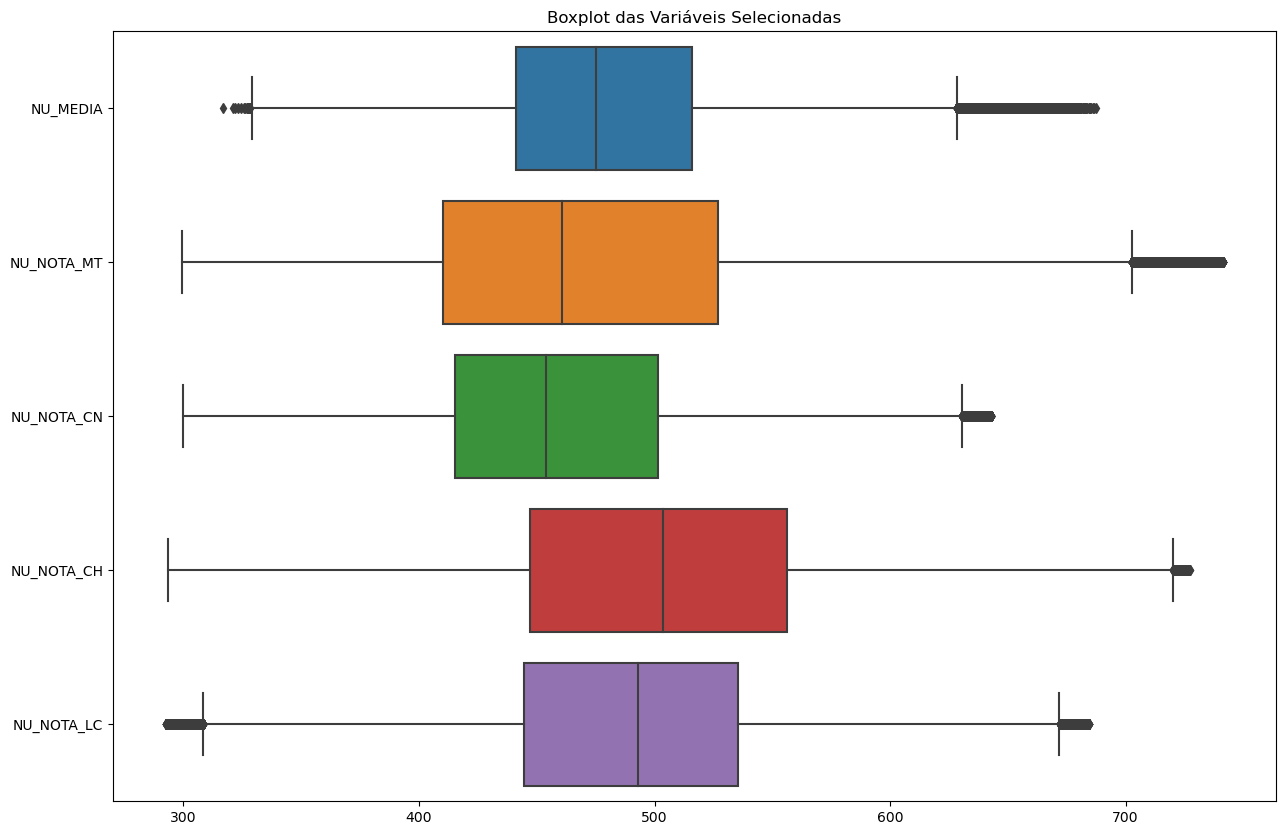

In [100]:
variaveis_selecionadas = ['NU_MEDIA', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

# Filtrar o DataFrame para incluir apenas essas variáveis
df_selecionado = df[variaveis_selecionadas]

# Criar o boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_selecionado, orient='h')
plt.title("Boxplot das Variáveis Selecionadas")
plt.show()

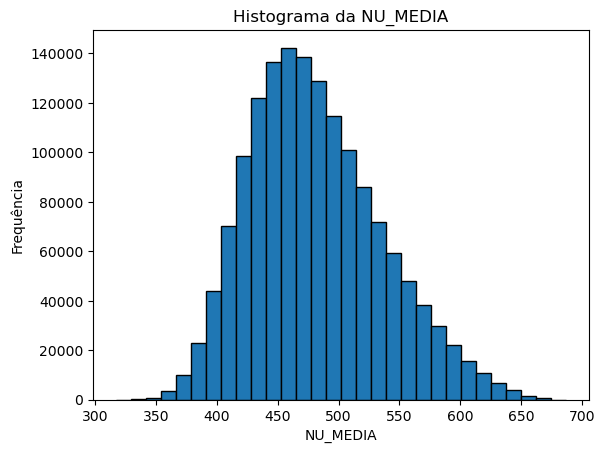

In [102]:
plt.hist(df['NU_MEDIA'], bins=30, edgecolor='k')
plt.xlabel('NU_MEDIA')
plt.ylabel('Frequência')
plt.title('Histograma da NU_MEDIA')
plt.show()

In [103]:

# Lista das variáveis para plotar
variaveis = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_MEDIA','NU_NOTA_REDACAO']

# Itera sobre cada variável e plota um histograma
for variavel in variaveis:
    plt.figure()
    plt.hist(df[variavel], bins=30, edgecolor='k')
    plt.xlabel('NOTAS')
    plt.ylabel('Frequência')
    plt.title(f'Histograma da {variavel}')
    
    # Salva a figura com alta qualidade
    plt.savefig(f'{variavel}_histograma.png', dpi=300, bbox_inches='tight')
    plt.close()  # Fecha o gráfico para evitar sobreposição

In [104]:
df.shape

(1529177, 57)

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_ANO,1529177.00,2018.55,2.57,2015.00,2016.00,2018.00,2021.00,2023.00
NU_IDADE,1529177.00,18.38,3.39,10.00,17.00,18.00,18.00,83.00
TP_ESTADO_CIVIL,1529177.00,0.48,0.53,0.00,0.00,0.00,1.00,4.00
TP_COR_RACA,1529177.00,2.30,0.98,0.00,1.00,3.00,3.00,6.00
TP_ST_CONCLUSAO,1529177.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
TP_ANO_CONCLUIU,1529177.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TP_ESCOLA,1529177.00,2.04,0.29,1.00,2.00,2.00,2.00,4.00
NU_NOTA_CN,1529177.00,460.79,59.86,299.90,415.10,453.90,501.30,643.00
NU_NOTA_CH,1529177.00,501.40,73.84,293.50,447.10,503.40,556.30,727.40
NU_NOTA_LC,1529177.00,488.61,65.18,292.60,444.70,492.90,535.60,684.60


### guardar data amostral

In [107]:
df.to_csv('df_amostra2.csv', sep = ';', index = False)

In [ ]:
#df.to_csv('df_amostra.csv', sep = ';', index = False)